In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('train_set.csv',index_col=0)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Is_Headquarters,Age of Company,Python,Spark,AWS,Excel,Job Categories,Seniority,Description_Length,Competitor Count
318,"Sr. Data Scientist, Cyber-Security LT Contract",$116K-$194K (Glassdoor est.),SUMMARYSenior Data Scientist will assist the c...,3.2,"Numeric, LLC","Phila, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,0,-1,1,1,1,1,Data Scientist,Senior,208,0
533,Director Data Science,$124K-$199K (Glassdoor est.),We’re looking for a director to drive our data...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,...,1,33,1,0,1,1,Director,NaN,753,0
539,Senior Scientist - Biostatistician,$65K-$96K (Glassdoor est.),British American Tobacco\r\nReynolds American ...,3.1,Reynolds American,"Winston-Salem, NC","Winston-Salem, NC",5001 to 10000 employees,1875,Company - Private,...,1,147,0,0,0,1,Data Analyst,Senior,698,0
653,Data Engineer - Consultant (Charlotte Based),$59K-$112K (Glassdoor est.),Do YOU love working with Data in machine learn...,4.2,Clarity Insights,"Charlotte, NC","Chicago, IL",201 to 500 employees,2008,Company - Private,...,0,14,1,0,0,1,Data Engineer,NaN,765,0
586,Data Scientist,$108K-$171K (Glassdoor est.),Advanced degree in Data Science Statistics Com...,3.5,e-IT Professionals Corp.,"Foster City, CA","Canton, MI",51 to 200 employees,-1,Company - Private,...,0,-1,1,0,0,0,Data Scientist,NaN,158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,Data Engineer,$57K-$80K (Glassdoor est.),Position Summary:\r\n\r\nThe Data Engineer wil...,3.5,Saama Technologies Inc,"Phoenix, AZ","Campbell, CA",501 to 1000 employees,1997,Company - Private,...,0,25,1,1,0,0,Data Engineer,NaN,151,3
79,"Director, Data Science",$139K-$220K (Glassdoor est.),"Reporting to the Sr. Director, Analytics & Dat...",3.6,Grainger,"Lake Forest, IL","Lake Forest, IL",10000+ employees,1927,Company - Public,...,1,95,1,0,0,1,Director,NaN,370,0
759,Data Engineer,$57K-$109K (Glassdoor est.),ICW Group is looking for aData Engineer who wi...,2.8,ICW Group,"San Diego, CA","San Diego, CA",501 to 1000 employees,1972,Company - Private,...,1,50,0,0,0,0,Data Engineer,NaN,481,3
730,Data Modeler (Analytical Systems),$66K-$117K (Glassdoor est.),"At MassMutual, were passionate about helping m...",3.6,MassMutual,"Boston, MA","Springfield, MA",5001 to 10000 employees,1851,Company - Private,...,0,171,0,1,1,1,Other,NaN,541,0


# Time to find correlations

In [7]:
df[['Age of Company','Avg Salary','Rating','Description_Length']].corr()

,Age of Company,Avg Salary,Rating,Description_Length
Age of Company,1.000000,-0.006351,-0.082665,0.155644
Avg Salary,-0.006351,1.000000,0.132609,0.083286
Rating,-0.082665,0.132609,1.000000,-0.056818
Description_Length,0.155644,0.083286,-0.056818,1.000000


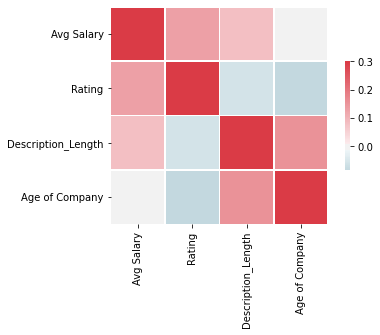

In [8]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['Avg Salary','Rating','Description_Length', 'Age of Company']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

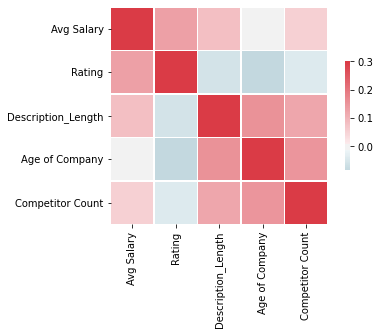

In [9]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['Avg Salary','Rating','Description_Length', 'Age of Company','Competitor Count']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [10]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary_Per_Hour', 'Min_Salary', 'Max_Salary', 'Avg Salary', 'State',
       'Is_Headquarters', 'Age of Company', 'Python', 'Spark', 'AWS', 'Excel',
       'Job Categories', 'Seniority', 'Description_Length',
       'Competitor Count'],
      dtype='object')

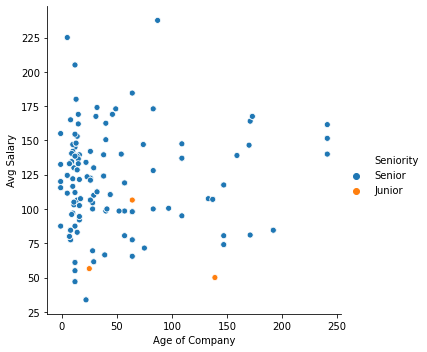

In [11]:
#we can see here that the juniors are on the lower half of the graph indicating a negative correlation
sns.relplot(x="Age of Company", y="Avg Salary",hue="Seniority", data=df)

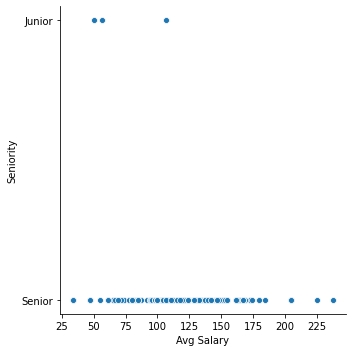

In [12]:
sns.relplot(x="Avg Salary",y="Seniority", data=df)

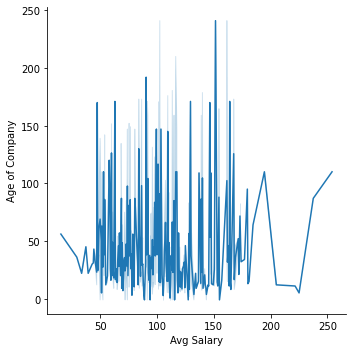

In [14]:
g = sns.relplot(x="Avg Salary", y="Age of Company", kind="line", data=df)
#g.figure.autofmt_xdate()

In [15]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary_Per_Hour', 'Min_Salary', 'Max_Salary', 'Avg Salary', 'State',
       'Is_Headquarters', 'Age of Company', 'Python', 'Spark', 'AWS', 'Excel',
       'Job Categories', 'Seniority', 'Description_Length',
       'Competitor Count'],
      dtype='object')

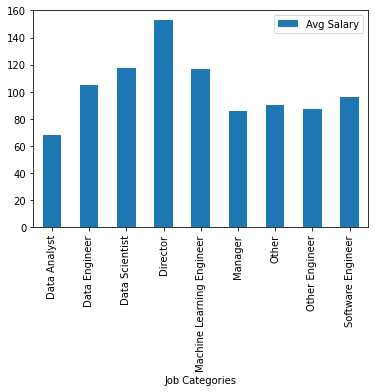

In [41]:
job_cat = pd.pivot_table(df, index =['Job Categories'], values='Avg Salary')

job_cat.plot(kind='bar')


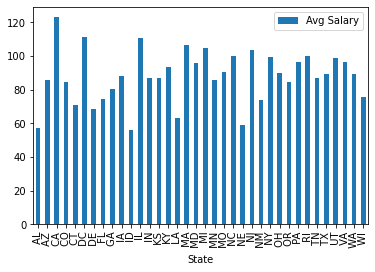

In [42]:
states = pd.pivot_table(df, index = 'State', values='Avg Salary')

states.plot(kind='bar')


In [53]:
job_tools = pd.pivot_table(df, index =['Spark','Python','AWS','Excel'], values='Avg Salary')
job_tools

Avg Salary
Spark Python AWS Excel            
0     0      0   0       92.354167
                 1       83.022917
             1   0       81.107143
                 1      102.333333
      1      0   0      112.264286
                 1      106.164706
             1   0      119.365385
                 1      111.100000
1     0      0   0       47.000000
                 1       95.388889
             1   0      130.857143
                 1      106.300000
      1      0   0      106.839286
                 1      113.821429
             1   0      123.683333
                 1      109.884615

In [55]:
ownership = pd.pivot_table(df, index =['Type of ownership'], values='Avg Salary')
ownership

,Avg Salary
Type of ownership,
-1,117.500000
College / University,106.318182
Company - Private,101.719605
Company - Public,110.338816
Government,90.576923
Hospital,70.576923
Nonprofit Organization,77.866279
School / School District,77.750000
Subsidiary or Business Segment,99.964286
